# Лабораторная работа 4

In [ ]:
import random
from decimal import Decimal, getcontext

## Задача 1

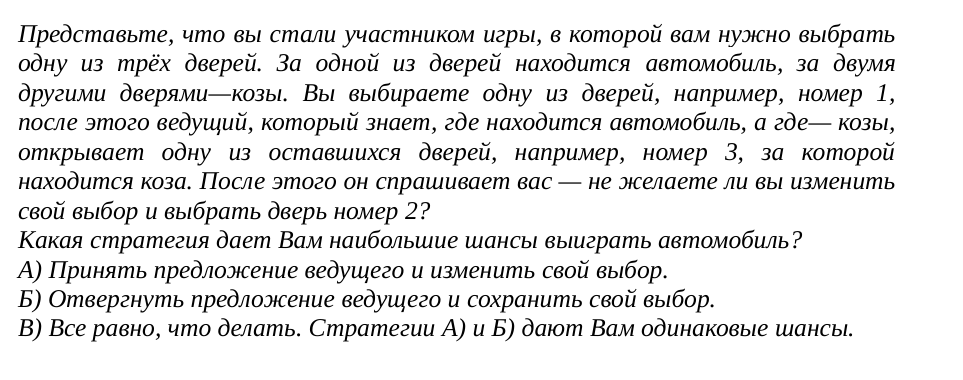

###Ключевая идея решения задачи
Начальная вероятность попасть на автомобиль — 1/3, а на козу — 2/3.
Если игрок выбрал козу (что происходит с вероятностью 2/3), то ведущий всегда откроет другую дверь с козой, и оставшаяся закрытая дверь будет с автомобилем. Поэтому при смене выбор игрок выигрывает во всех случаях, когда изначально ошибся

In [ ]:


def monty_hall_trial(switch: bool) -> bool:
    doors = [0, 1, 2]  # индексы дверей
    car_door = random.choice(doors)       # где машина
    player_choice = random.choice(doors)  # исходный выбор игрока

    # Ведущий открывает дверь с козой, отличную от выбора игрока
    possible_doors_to_open = [
        d for d in doors if d != player_choice and d != car_door
    ]
    opened_by_host = random.choice(possible_doors_to_open)

    if switch:
        # Игрок меняет выбор на другую закрытую дверь
        remaining_doors = [d for d in doors if d not in (player_choice, opened_by_host)]
        player_choice = remaining_doors[0]

    # Выигрыш, если дверь игрока = дверь с машиной
    return player_choice == car_door


def run_monty_hall_sim(num_trials: int = 100000):
    wins_switch = 0
    wins_stay = 0

    for _ in range(num_trials):
        if monty_hall_trial(switch=True):
            wins_switch += 1
        if monty_hall_trial(switch=False):
            wins_stay += 1

    print(f"СМЕНИТЬ   выигрыш в {wins_switch / num_trials} случаев")
    print(f"НЕ МЕНЯТЬ выигрыш в {wins_stay / num_trials} случаев")

In [ ]:
run_monty_hall_sim(100000)

СМЕНИТЬ:   выигрыш в 0.66782 случаев
НЕ МЕНЯТЬ: выигрыш в 0.33579 случаев


## Задача 2

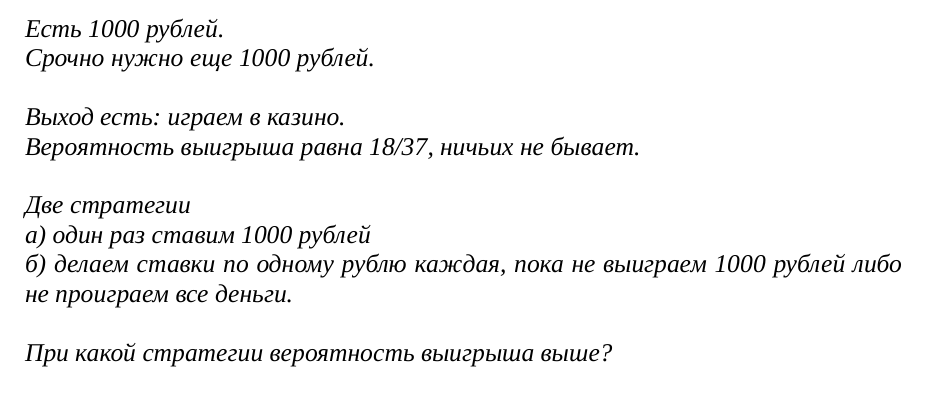

### 1. один раз ставим 1000 рублей
Вероятность успеха при этой стратегии равна просто вероятности выиграть одну ставку:

$$
P_{(a)} = p = \frac{18}{37} = 0{,}4865
$$

### 2. ставки по 1 рублю
Ищем вероятность того, что мы достигнем $N = 2000$ рублей раньше 0, стартуя с $i = 1000$.

Для случайного блуждания с границами 0 и $N$ и шагами +1/−1 с вероятностями $p$ и $q$ при $p \neq q$ вероятность достичь $N$ раньше 0 имеет вид:

$$
P_{(b)} = \mathbb{P}(\text{достигнуть } N \mid \text{старт } i)
= \frac{1 - \left(\frac{q}{p}\right)^i}{1 - \left(\frac{q}{p}\right)^N}
$$



Подставляем значения в формулу:

$$
\left(\frac{q}{p}\right)^i = \left(\frac{19}{18}\right)^{1000}, \quad
\left(\frac{q}{p}\right)^N = \left(\frac{19}{18}\right)^{2000}.
$$


$$
P_{(b)} = \left(\frac{p}{q}\right)^{1000}
= \left(\frac{18}{19}\right)^{1000} = 3 \cdot 10^{-24}
$$


In [ ]:
getcontext().prec = 80 #для работы со степенями

p = Decimal(18) / Decimal(37)
q = Decimal(19) / Decimal(37)
ratio = q / p  # q/p > 1

N = 2000
i = 1000

ratio_i = ratio ** i
ratio_N = ratio ** N

P_strategy_b = (Decimal(1) - ratio_i) / (Decimal(1) - ratio_N)

print("Вероятность выигрыша при стратегии (а) (одна ставка 1000 руб):", float(p))
print("Вероятность выигрыша при стратегии (б) (ставки по 1 руб):   ", float(P_strategy_b))


Вероятность выигрыша при стратегии (а) (одна ставка 1000 руб): 0.4864864864864865
Вероятность выигрыша при стратегии (б) (ставки по 1 руб):    3.3029663596866594e-24
